<a href="https://colab.research.google.com/github/sonalgan/Bhaashaa/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning for Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
df=pd.read_csv('/content/Health Survey 2021 (Responses) - Form Responses 1.csv')

In [100]:
df=df[df['Informed Consent']=='Yes']
df=df.drop(columns=['Informed Consent','Email Address','Timestamp'])


In [102]:
df.shape

(160, 55)

In [ ]:
df.info()

In [104]:
depression_choices=['Not at all',
'Just a little',
'Somewhat',
'Moderately',
'Quite a lot',
'Very much']
depressiontest_columns=[]
for i in df.columns[14:14+18]:
  depressiontest_columns.append(i)

In [ ]:
depressiontest_columns

In [106]:
for i in depressiontest_columns:
  for j in range(len(depression_choices)):
    df.loc[df[i]==depression_choices[j],i]=j

In [107]:
depression_scores=[]
for i in range(len(df)):
  score=0
  for j in depressiontest_columns:
    score+=df[j].iloc[i]
  depression_scores.append(score)
df=df.assign(DepressionScale=depression_scores)
df=df.drop(columns=depressiontest_columns)


In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [110]:
cleanup={
    'Finding survey': {np.nan: 'Whatsapp' },
    'Area': {np.nan: 'Urban' },
    'Occupation': {np.nan: 'Computer and Mathematical'},
    'Inclination to Substance Abuse - Alcohol': {np.nan: 'Not At All'},
    'Inclination to Substance Abuse - Smoking': {np.nan: 'Not At All'},
    'Inclination to Substance Abuse - Tobacco': {np.nan: 'Not At All'},
    'Inclination to Substance Abuse - Drugs': {np.nan: 'Not At All'}
}

In [112]:
cleanup={
    'Difficulty level to manage daily/household expenses' : {np.nan: 3.0 }
}

In [114]:
cleanup={
    'Additional Diseases': {np.nan : 'Not Applicable'}
}

In [116]:
cleanup={
    'Occupation': { 'Engineering': 'Architecture and Engineering',
                   'Data Science & Engineering': 'Computer and Mathematical',
                   'VLSI':'Architecture and Engineering',
                   'Student': 'Computer and Mathematical',
                   'Computer Science Engineering Student':'Computer and Mathematical',
                   'I am currently not working': 'None',
                   'Unemployed':'None',
                   'Student ':'Architecture and Engineering',
                   'Construction and Extractionion': 'Construction and Extraction',
                   'Engineering student' : 'Architecture and Engineering',
                    'Iam an undergraduate student' : 'Computer and Mathematical',
                     'student': 'Architecture and Engineering',
                     'Study': 'Architecture and Engineering',
                   'Engineering student ': 'Architecture and Engineering'
                   }
}

In [150]:
cleanup={
    'Level of Education': {'Diploma in computer technology ':'Vocational Training'}
}

In [151]:
df=df.replace(cleanup)

In [152]:
df['Level of Education'].unique()

array(['PhD', '12th Grade or SSC', 'Bachelor’s degree', 'Master’s degree',
       'Vocational Training'], dtype=object)

In [61]:
df['Difficulty level to manage daily/household expenses'].value_counts().nlargest(n=1)

3.0    61
Name: Difficulty level to manage daily/household expenses, dtype: int64

In [12]:
df.DepressionScale.unique()

array([17,  8, 29, 23, 18, 22,  0,  1,  3,  6, 81, 13,  9, 14,  4, 30, 35,
       25, 48, 39,  5, 61, 37, 15, 56, 73, 40, 34, 20, 11, 47, 16, 50, 32,
       26, 51,  2, 66, 36, 62, 10, 24, 41, 63, 72, 27, 90, 42, 58, 67, 55,
        7, 69, 19, 64, 43, 75, 86, 21, 60, 57, 38])

In [13]:
df.DepressionScale.value_counts()

0     10
8      8
4      7
5      7
17     7
      ..
86     1
48     1
38     1
41     1
90     1
Name: DepressionScale, Length: 62, dtype: int64

In [121]:
df.corr()

,No. of Family Members,Inclinination towards exercise per week,Difficulty level to manage daily/household expenses,Affect of Covid on Daily Schedule,DepressionScale
No. of Family Members,1.000000,-0.102987,-0.002604,-0.004365,0.099152
Inclinination towards exercise per week,-0.102987,1.000000,0.028350,0.166185,-0.229864
Difficulty level to manage daily/household expenses,-0.002604,0.028350,1.000000,-0.104661,0.402112
Affect of Covid on Daily Schedule,-0.004365,0.166185,-0.104661,1.000000,-0.164357
DepressionScale,0.099152,-0.229864,0.402112,-0.164357,1.000000


In [122]:
df1=df.copy()

## Data Visulaisation

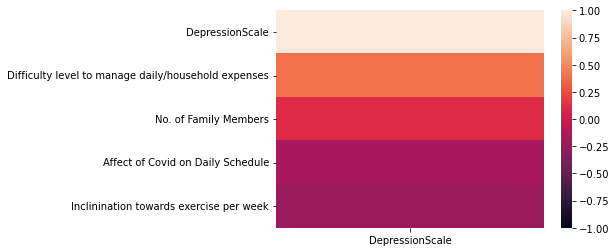

In [63]:
sns.heatmap(df.corr()[['DepressionScale']].sort_values(by='DepressionScale', ascending=False),vmin=-1,vmax=1)
plt.show()

In [123]:
from matplotlib import style
style.use('default')

In [ ]:
axarr = df.hist(column='DepressionScale',sharex=True, sharey=True, layout = (2, 2))

for ax in axarr.flatten():
    ax.set_xlabel("Depression Scale")
    ax.set_ylabel("Count")
    ax.set_title('Histogram of DepressionScale')

In [ ]:
axarr = df.hist(column='No. of Family Members',sharex=True, sharey=True, layout = (1, 1))

for ax in axarr.flatten():
    ax.set_xlabel("No. of Family Members")
    ax.set_ylabel("Count")
    ax.set_title('Histogram of No. of Family Members')

In [ ]:
axarr = df.hist(column='Inclinination towards exercise per week',sharex=True, sharey=True, layout = (1, 1))

for ax in axarr.flatten():
    ax.set_xlabel("Inclinination towards exercise per week")
    ax.set_ylabel("Count")
    ax.set_title('Histogram of Inclinination towards exercise per week')

In [ ]:
axarr = df.hist(column='Affect of Covid on Daily Schedule',sharex=True, sharey=True, layout = (1, 1))

for ax in axarr.flatten():
    ax.set_xlabel("Affect of Covid on Daily Schedule")
    ax.set_ylabel("Count")
    ax.set_title('Histogram of Affect of Covid on Daily Schedule')

In [ ]:
axarr = df.hist(column='Age',sharex=True, sharey=True)

for ax in axarr.flatten():
    ax.set_xlabel("Difficulty level to manage daily/household expenses")
    ax.set_ylabel("Count")
    ax.set_title('Histogram of Difficulty level to manage daily/household expenses')

In [ ]:
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=30, horizontalalignment="center")


In [ ]:
plt.figure(figsize=(15,5))
df['DepressionScoringRange'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Depression Scoring Range')
plt.xlabel('DepressionScoringRange')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(7,5))
df['Area'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(6,5))
df['Marital Status'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(9,5))
df['Level of Education'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(9,5))
df['Current Employment Status'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Current Employment Status')
plt.xlabel('Current Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(5,5))
df['Death in Family/Friends(due to Covid)'].value_counts().plot(kind='bar')
plt.title('Bar Graph for Death in Family/Friends(due to Covid)')
plt.xlabel('Death in Family/Friends(due to Covid)')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
plt.figure(figsize=(8,5))
df['No. of hours of sleep per day'].value_counts().plot(kind='bar')
plt.title('Bar Graph for No. of hours of sleep per day')
plt.xlabel('No. of hours of sleep per day')
plt.ylabel('Count')
plt.xticks(rotation=0, horizontalalignment="center")


In [261]:
df=df.replace(to_replace='Often (Weekly)',value='Often(Weekly)')

In [ ]:
df[df.columns[33:37]]

In [ ]:

import plot_likert

plot_likert.plot_likert(df[df.columns[33:37]], another_scale, plot_percentage=True)

In [264]:
df.to_csv('FinalisedData-HealthSurvey.csv',index=False)

In [259]:


another_scale = \
    ['Not At All',
     'Rarely',
     'Occassionally',
     'Often(Weekly)',
     'Almost Daily']



In [ ]:
df[df.columns[21:25]]

In [375]:
df=pd.read_csv('/content/FinalisedData-HealthSurvey.csv')

## Data Cleaning (Classification)

In [ ]:
df['DepressionScoringRange']=pd.cut(df['DepressionScale'],bins=[-1,9,17,21,35,53,100],labels=['No Depression Likely','Possibly Mildly Depressed','Borderline Depression','Mild-Moderate Depression','Moderate-Severe Depression','Severely Depressed'])

In [ ]:
df=df.drop(columns='DepressionScale')

In [ ]:
df['DepressionScoringRange']=df['DepressionScoringRange'].astype('object')

In [ ]:
df.dtypes

In [ ]:
df.DepressionScoringRange.unique()

array(['Possibly Mildly Depressed', 'No Depression Likely',
       'Mild-Moderate Depression', 'Borderline Depression',
       'Severely Depressed', 'Moderate-Severe Depression'], dtype=object)

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df.to_csv('FinalisedData-HealthSurvey(Classification).csv')

## Encoding Labels and Data Normalisation

In [ ]:
df=df.drop(columns='DepressionScale')

In [ ]:
df1=df.select_dtypes(include='object')
df2=df.select_dtypes(exclude='object')

In [ ]:
df.dtypes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/FinalisedData-HealthSurvey.csv')

In [ ]:
df.DepressionScoringRange.unique()

array([4, 3, 1, 0, 6, 5, 2])

In [ ]:
labelencoder = LabelEncoder()
for column in df1.columns:
  df[column] = labelencoder.fit_transform(df[column].astype(str))
scaler = MinMaxScaler()

df[df2.columns] = scaler.fit_transform(df[df2.columns])

In [ ]:
labelencoder.classes_

array(['Borderline Depression', 'Mild-Moderate Depression',
       'Moderate-Severe Depression', 'No Depression Likely',
       'Possibly Mildly Depressed', 'Severely Depressed'], dtype=object)

## Principal Compnonent Analysis

In [369]:
from sklearn.decomposition import PCA
X = df.drop('DepressionScoringRange', axis=1).values
y = df['DepressionScoringRange'].values

In [374]:

pca = PCA(n_components=0.99)
x_pca = pca.fit_transform(X)
print('No. of features before PCA:',X.shape)
print('No. of features after PCA(90% variance):',x_pca.shape)

No. of features before PCA: (160, 37)
No. of features after PCA(90% variance): (160, 33)


In [ ]:
df